,x1,x2,x3,x4,x5,Counts
1,1,0,0,0,1,81
0,1,0,0,1,1,75
2,1,0,0,0,0,73
15,1,0,1,1,0,70
4,1,1,1,0,1,67
12,1,1,1,1,1,67
14,1,1,0,0,0,67
8,1,0,1,0,1,64
11,1,0,1,0,0,64
9,1,0,0,1,0,63


c:\Users\km_ha\miniconda3\envs\oldqiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


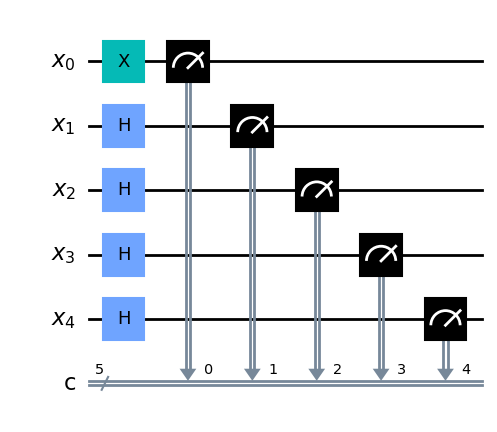

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
import pandas as pd
from IPython.display import display

# Create selection register
x = QuantumRegister(5, 'x')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(x, c)

# Initialize x1 = 1, others in superposition
qc.x(x[0])          # x1 = 1
qc.h(x[1:])         # x2 to x5 = Hadamard

qc.measure(x, c)

# Run simulation
sim = Aer.get_backend("aer_simulator")
result = sim.run(qc, shots=1024).result()
counts = result.get_counts()

# Format output as table
table_data = []
for bitstring, count in counts.items():
    bits = list(reversed(bitstring))  # Qiskit gives MSB→LSB
    row = {f'x{i+1}': bits[i] for i in range(5)}
    row['Counts'] = count
    table_data.append(row)

df = pd.DataFrame(table_data).sort_values('Counts', ascending=False)

# Show table
display(df)
#show the circuti
qc.draw(output='mpl')

c:\Users\km_ha\miniconda3\envs\oldqiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


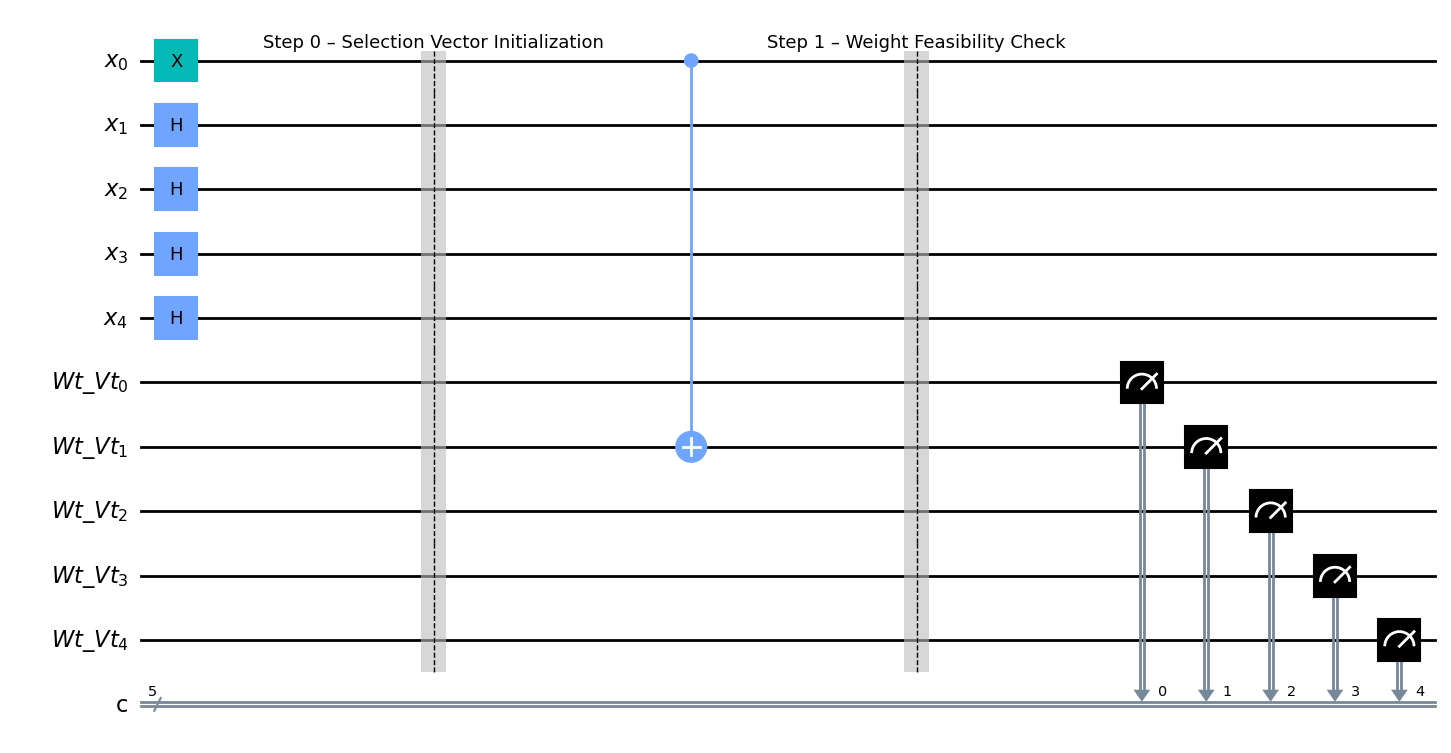

,Wt_Vt[0],Wt_Vt[1],Wt_Vt[2],Wt_Vt[3],Wt_Vt[4],Counts
0,0,1,0,0,0,1024


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
import pandas as pd
from IPython.display import display

# Problem setup
weights = [2, 3, 4, 5, 9]
weight_0_bin = format(weights[0], '05b')  # binary of item 0's weight

# Quantum Registers
x = QuantumRegister(5, 'x')              # Selection register x1 to x5
Wt_Vt = QuantumRegister(5, 'Wt_Vt')      # Temporary weight/value register
c = ClassicalRegister(5, 'c')            # Classical bits for Wt_Vt
qc = QuantumCircuit(x, Wt_Vt, c)

# === Step 0: Selection vector initialization ===
qc.x(x[0])          # Set x1 = 1
qc.h(x[1:])         # Put x2 to x5 in superposition
qc.barrier(label="Step 0 – Selection Vector Initialization")

# === Step 1a: Conditional weight affectation ===
for i, bit in enumerate(reversed(weight_0_bin)):  # LSB → MSB
    if bit == '1':
        qc.cx(x[0], Wt_Vt[i])  # Load weight[0] into Wt_Vt if x0 == 1
qc.barrier(label="Step 1 – Weight Feasibility Check")

# === Final Step: Measurement of Wt_Vt ===
qc.measure(Wt_Vt, c)

# Run simulation
sim = Aer.get_backend("aer_simulator")
result = sim.run(qc, shots=1024).result()
counts = result.get_counts()

# Format as table
table = []
for bitstring, count in counts.items():
    bits = list(reversed(bitstring))  # reverse MSB → LSB
    row = {f'Wt_Vt[{i}]': bits[i] for i in range(5)}
    row['Counts'] = count
    table.append(row)

df = pd.DataFrame(table).sort_values("Counts", ascending=False)

# Show circuit and result
display(qc.draw(output='mpl'))
display(df)

C:\Users\km_ha\AppData\Local\Temp\ipykernel_9076\574930570.py:56: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('aer_simulator')
C:\Users\km_ha\AppData\Local\Temp\ipykernel_9076\574930570.py:58: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(tqc, simulator, shots=1024).result()
c:\Users\km_ha\miniconda3\envs\oldqiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default expli

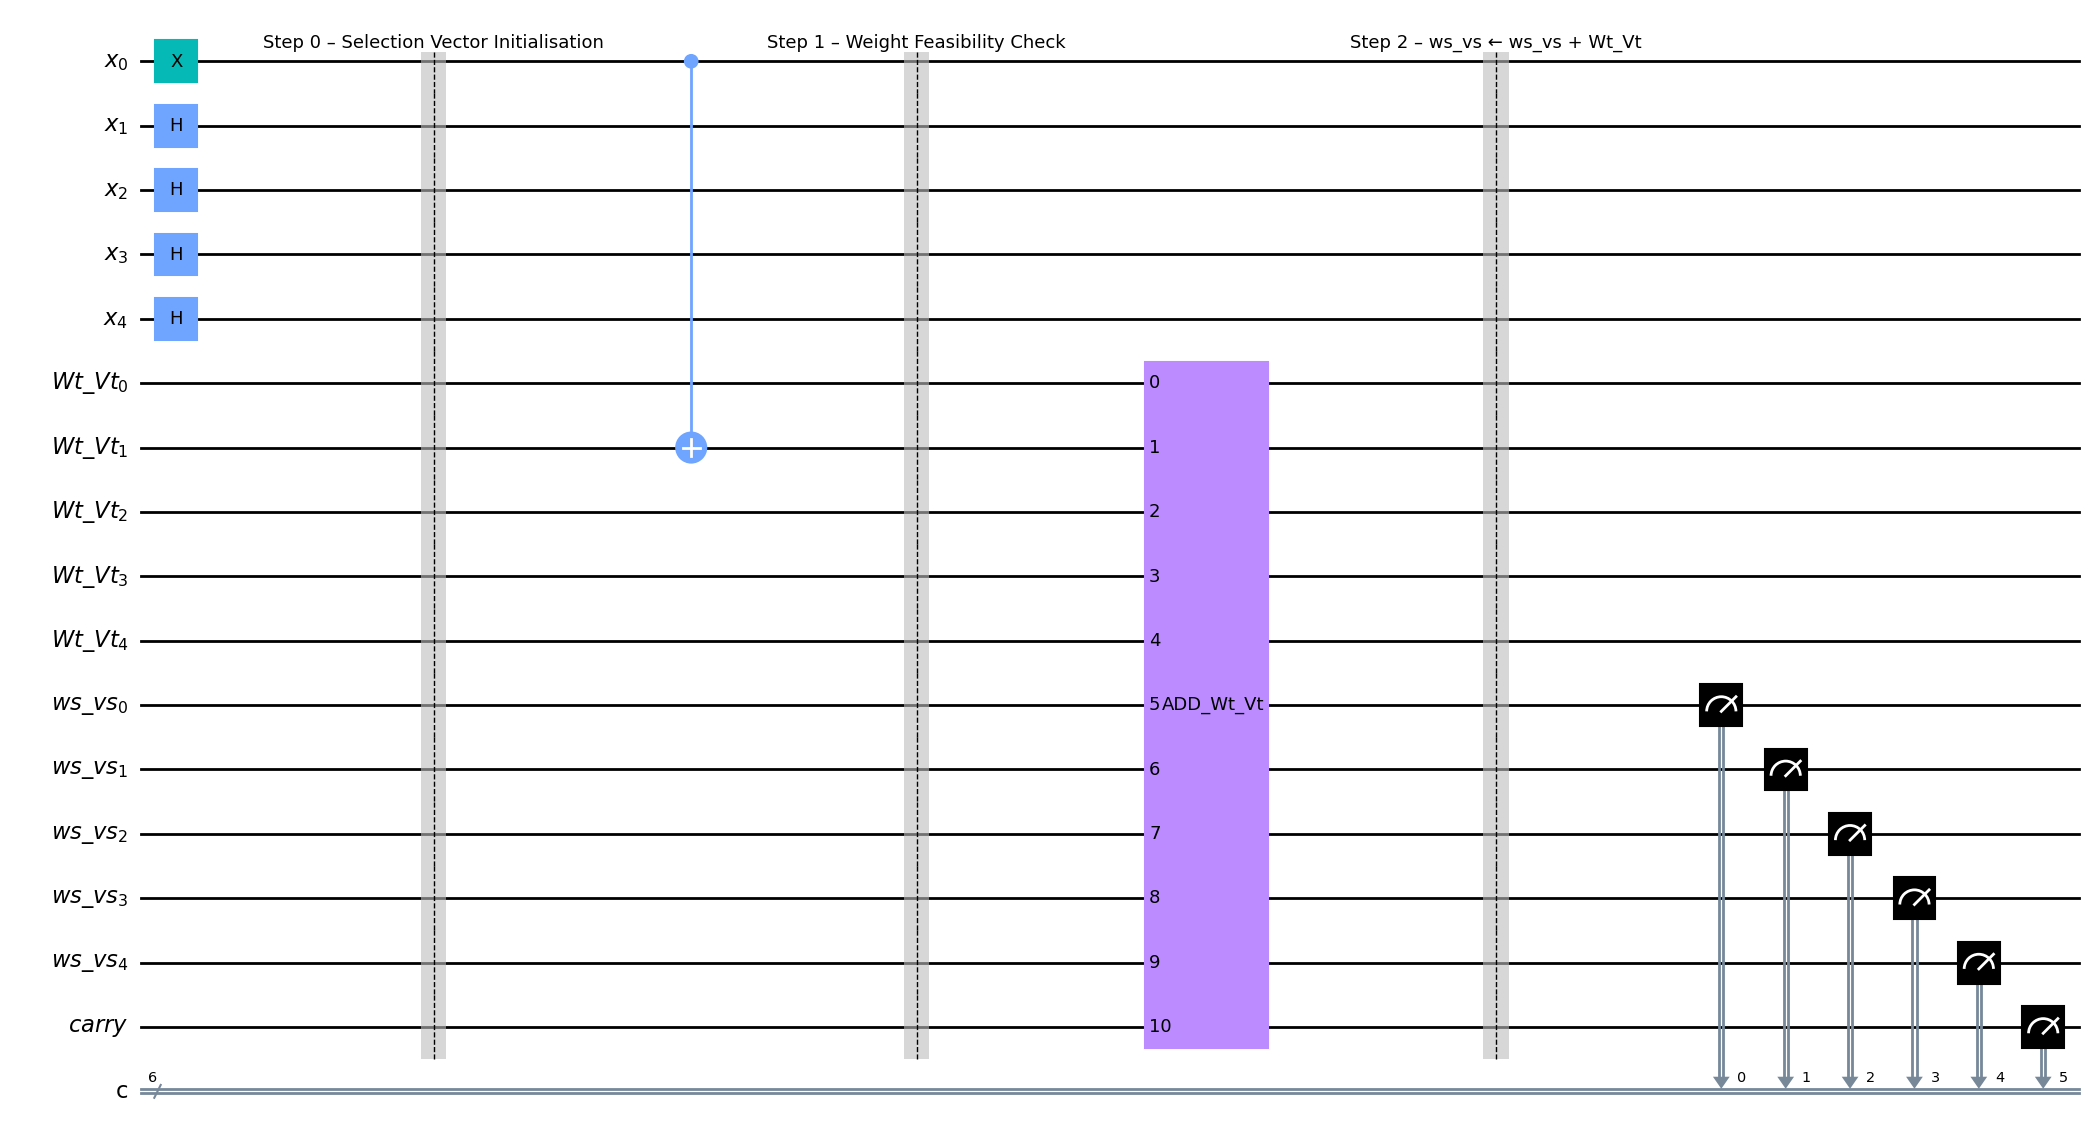

,ws_vs[0],ws_vs[1],ws_vs[2],ws_vs[3],ws_vs[4],Carry,Counts
0,0,1,0,0,0,0,1024


In [1]:
from qiskit import (
    QuantumCircuit, QuantumRegister, ClassicalRegister,
    Aer, transpile, execute
)
from qiskit.circuit.library.arithmetic import DraperQFTAdder
import pandas as pd
from IPython.display import display

# ───────────────────────────────────────────
# Problem setup
# ───────────────────────────────────────────
weights = [2, 3, 4, 5, 9]
weight_0_bin = format(weights[0], '05b')        # 5-bit binary for item-0 weight

# ───────────────────────────────────────────
# Quantum & classical registers
# ───────────────────────────────────────────
x       = QuantumRegister(5, 'x')               # Selection register x1…x5
Wt_Vt   = QuantumRegister(5, 'Wt_Vt')           # Temporary weight/value bits
ws_vs   = QuantumRegister(5, 'ws_vs')           # Running (W,S) sum register
carry   = QuantumRegister(1, 'carry')           # Carry qubit for half-adder
c       = ClassicalRegister(6, 'c')             # Classical bits (ws_vs + carry)

qc = QuantumCircuit(x, Wt_Vt, ws_vs, carry, c)

# ───────────────────────────────────────────
# Step 0 – Selection-vector initialisation
# ───────────────────────────────────────────
qc.x(x[0])                # choose item 0 with certainty
qc.h(x[1:])               # superposition over items 1…4
qc.barrier(label="Step 0 – Selection Vector Initialisation")

# ───────────────────────────────────────────
# Step 1a – Conditional weight load into Wt_Vt
# ───────────────────────────────────────────
for i, bit in enumerate(reversed(weight_0_bin)):   # LSB → MSB
    if bit == '1':
        qc.cx(x[0], Wt_Vt[i])
qc.barrier(label="Step 1 – Weight Feasibility Check")

# ───────────────────────────────────────────
# Step 1b – Add Wt_Vt into ws_vs  (2 + 0 → 2)
# ───────────────────────────────────────────
adder = DraperQFTAdder(5, kind='half').to_gate(label="ADD_Wt_Vt")
qc.append(adder, Wt_Vt[:] + ws_vs[:] + carry[:])
qc.barrier(label="Step 2 – ws_vs ← ws_vs + Wt_Vt")

# ───────────────────────────────────────────
# Final step – Measurement
# ───────────────────────────────────────────
qc.measure(ws_vs[:] + carry[:], c)

# ───────────────────────────────────────────
# Simulation
# ───────────────────────────────────────────
simulator = Aer.get_backend('aer_simulator')
tqc = transpile(qc, simulator)
result = execute(tqc, simulator, shots=1024).result()
counts = result.get_counts()

# Display circuit and result table (same style as before)
display(qc.draw(output='mpl',fold=1))

table = []
for bitstring, count in counts.items():
    bits = list(reversed(bitstring))          # LSB-first for readability
    row = {f'ws_vs[{i}]': bits[i] for i in range(5)}
    row['Carry'] = bits[5]
    row['Counts'] = count
    table.append(row)

df = pd.DataFrame(table).sort_values("Counts", ascending=False)
display(df)

C:\Users\km_ha\AppData\Local\Temp\ipykernel_9076\111035923.py:68: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result  = execute(transpile(qc, backend), backend, shots=1024).result()
c:\Users\km_ha\miniconda3\envs\oldqiskit\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
c:\Users\km_ha\miniconda3\envs\oldqiskit\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12297 (\N{RIGHT

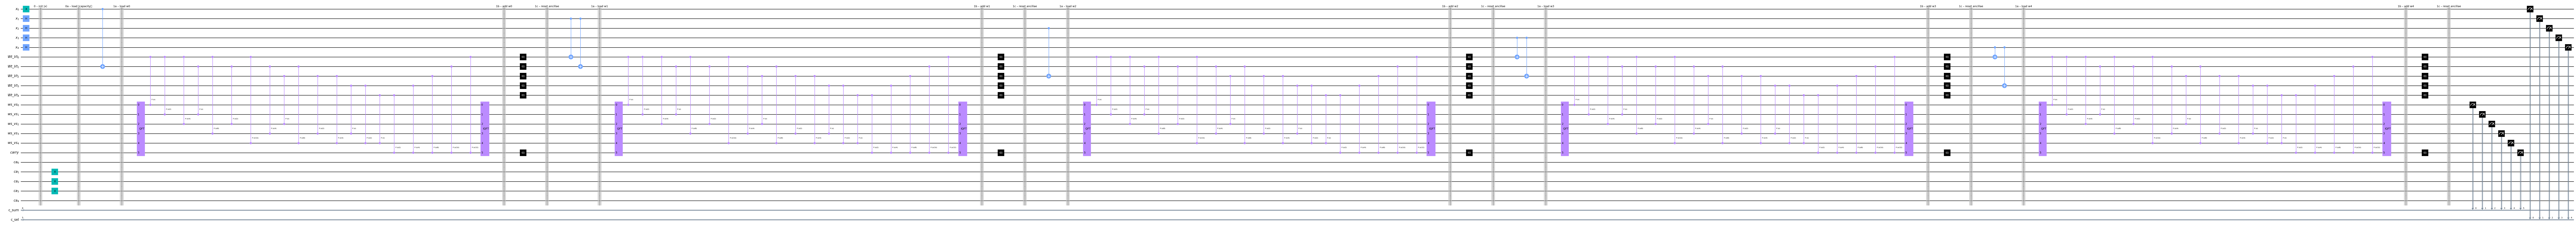

,x bits (MSB→LSB),ws_vs bits,carry,Total weight,Shots
9,00001,000010,,2,58
15,00011,000101,,5,61
4,00101,000110,,6,72
2,01001,000111,,7,51
0,00111,001001,,9,64
11,01011,001010,,10,58
10,01101,001011,,11,69
14,10001,001011,,11,61
6,01111,001110,,14,64
7,10011,001110,,14,57


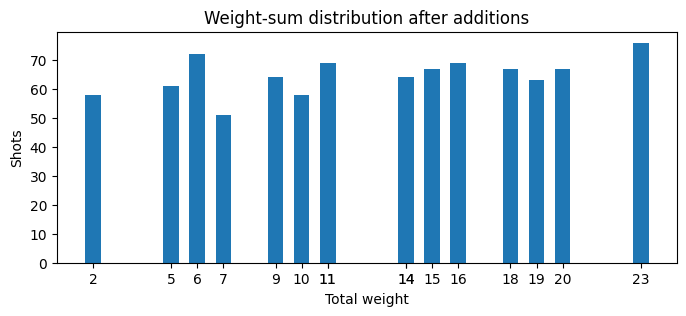

In [5]:
# ==============================================================
# FULL UPDATED KNAPSACK-WEIGHT CIRCUIT  (weights only)
# ==============================================================
from qiskit import (
    QuantumCircuit, QuantumRegister, ClassicalRegister,
    Aer, transpile, execute
)
from qiskit.circuit.library.arithmetic import DraperQFTAdder
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# ──────────  DATA  ─────────────────────────────────────────────
weights  = [2, 3, 4, 5, 9]     # five items
capacity = 14                  # knapsack capacity (unused yet)
n_bits   = 5                   # 5-bit registers (0‥31)

# ──────────  REGISTERS  ────────────────────────────────────────
x       = QuantumRegister(5, 'x')      # selection bits
Wt_Vt   = QuantumRegister(5, 'Wt_Vt')  # addend (re-used)
ws_vs   = QuantumRegister(5, 'ws_vs')  # running Σ(weights)
carry   = QuantumRegister(1, 'carry')  # single carry ancilla
ca      = QuantumRegister(5, 'ca')     # capacity |14>  (for later)
c_sum   = ClassicalRegister(6, 'c_sum')# ws_vs[4…0] + carry
c_sel   = ClassicalRegister(5, 'c_sel')# selection bits

qc = QuantumCircuit(x, Wt_Vt, ws_vs, carry, ca, c_sum, c_sel)

# ────────── 0) initialise selection register  ──────────────────
qc.x(x[0])          # choose item-0
qc.h(x[1:])         # superpose items 1-4
qc.barrier(label="0 – init |x⟩")

# capacity |14〉 = 0 1 1 1 0₂  (MSB-left in ca[4]…ca[0])
for i, bit in enumerate(format(capacity, '05b')[::-1]):  # LSB-first loop
    if bit == '1':
        qc.x(ca[i])
qc.barrier(label="0a – load |capacity〉")

# Draper half-adder (target first, addend second, 1 carry) – pre-decomposed
adder = DraperQFTAdder(n_bits, kind='half').decompose()

# ────────── 1) loop:  load → add → reset  ──────────────────────
for idx, w in enumerate(weights):
    w_bits = format(w, '05b')[::-1]                # LSB-first

    # 1a) conditionally load item-weight into Wt_Vt
    for j, bit in enumerate(w_bits):
        if bit == '1':
            qc.cx(x[idx], Wt_Vt[j])
    qc.barrier(label=f"1a – load w{idx}")

    # 1b) add Wt_Vt into ws_vs  **(TARGET FIRST!)**
    qc.compose(adder,  Wt_Vt[:]+ ws_vs[:] + carry[:], inplace=True)
    qc.barrier(label=f"1b – add w{idx}")

    # 1c) reset ancillæ for reuse
    qc.reset(Wt_Vt)
    qc.reset(carry)
    qc.barrier(label=f"1c – reset ancillae")

# ────────── 2) measure selection & sum registers  ──────────────
qc.measure(ws_vs[:] + carry[:], c_sum)
qc.measure(x,                 c_sel)

# ────────── simulate  ──────────────────────────────────────────
backend = Aer.get_backend('aer_simulator')
result  = execute(transpile(qc, backend), backend, shots=1024).result()
counts  = result.get_counts()

# ────────── decode counts → table  ─────────────────────────────
rows = []
for key, shots in counts.items():
    # key order:  x4 x3 x2 x1 x0  carry ws4 ws3 ws2 ws1 ws0
    sel_bits  = key[0:5]           # x4…x0  (MSB→LSB)
    carry_bit = key[5]
    sum_bits  = key[6:]            # ws4…ws0 (MSB→LSB)
    rows.append({
        'x bits (MSB→LSB)': sel_bits,
        'ws_vs bits':        sum_bits,
        'carry':             carry_bit,
        'Total weight':      int(sum_bits, 2),
        'Shots':             shots
    })

df = pd.DataFrame(rows).sort_values('Total weight')
display(qc.draw('mpl', fold=1))
display(df)

# optional bar-plot
plt.figure(figsize=(8,3))
plt.bar(df['Total weight'], df['Shots'], width=.6)
plt.xlabel('Total weight')
plt.ylabel('Shots')
plt.title('Weight-sum distribution after additions')
plt.xticks(df['Total weight'])
plt.show()